In [5]:
# Searching for STIX Science X-ray data (FULL resolution science data)

from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient 

# Defining the time range for the GOES data
start_time = "2024-05-14T04:00:00"
end_time = "2024-05-14T06:00:00"


sci_query = Fido.search(a.Time(start_time, end_time), 
                        a.Instrument.stix,
                        a.stix.DataType.sci)
print(" Science data of STIX Files:", sci_query)

 Science data of STIX Files: Results from 1 Provider:

3 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType  DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------- --- ----------
2024-05-14 03:43:56.000 2024-05-14 05:16:41.000       STIX    L1      SCI  sci-xray-cpd V02 2405148542
2024-05-14 03:46:25.000 2024-05-14 09:46:12.000       STIX    L1      SCI  sci-xray-cpd V02 2405148051
2024-05-14 02:29:58.000 2024-05-14 08:34:58.000       STIX    L1      SCI sci-xray-spec V02 2405141390




In [6]:
# Downloading the data
sci_files = Fido.fetch(sci_query)


Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20240514T034625-20240514T094612_V02_2405148051-50394.fits:   0%|          | 0.00/9.4…

solo_L1_stix-sci-xray-cpd_20240514T034356-20240514T051641_V02_2405148542-53652.fits:   0%|          | 0.00/34.…

solo_L1_stix-sci-xray-spec_20240514T022958-20240514T083458_V02_2405141390-49950.fits:   0%|          | 0.00/3.…

In [19]:
# Getting Compressed pixel data(cpd)

sci_files = sorted(sci_files)

spec = Product(sci_files[1])
spec



CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x7dbfa825f320>
    Start: 2024-05-14 03:46:25
    End:   2024-05-14 09:46:12
    Center:2024-05-14 06:46:18
    Duration:0.24984722222222222 days or
           5.996333333333333 hours or
           359.78 minutes or
           21586.8 seconds
    DetectorMasks
    [0...357]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0...357]: [['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0']]

    EnergyEdgeMasks
    [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,_,_,_,_,_,_,_,_,_,_,_,_,_,_]

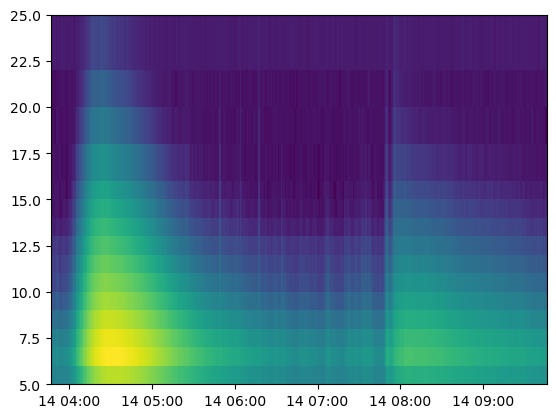

In [20]:
# PLotting Spectrogram covering similar time range of CPD

spec.plot_spectrogram()

In [21]:
# Searching for STIX Quick-Look(ql) X-ray data (LOW Resolution data)

from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido

ql_query = Fido.search(a.Time(start_time, end_time), 
                       a.Instrument.stix,
                       a.stix.DataProduct.ql_lightcurve)
ql_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
Time,Time,str4,str2,str2,str13,str3,str1
2024-05-14 00:00:00.000,2024-05-14 23:59:59.999,STIX,L1,QL,ql-lightcurve,V02,-


In [22]:
# Downloading the datasets

ql_files = Fido.fetch(ql_query)
print("Downloaded STIX Files:", ql_files)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-ql-lightcurve_20240514_V02.fits:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

Downloaded STIX Files: ['/home/jashhwanth/sunpy/data/solo_L1_stix-ql-lightcurve_20240514_V02.fits']


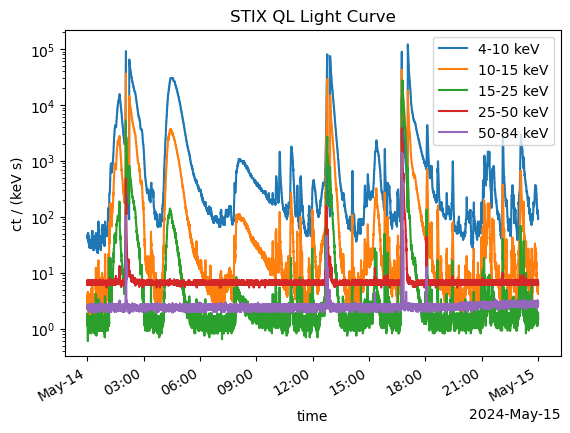

In [24]:
 # Loading STIX X-ray time series for 1 st Dataset

from datetime import datetime
from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves.peek()
# Peek


In [4]:
import matplotlib.pyplot as plt
from sunpy.time import parse_time
#from stixpy.science import Spectrogram
from stixpy.product.sources import Spectrogram
#from stixpy.instruments.stix import STIXQLClient

# Define the time range (UTC format)
start_time = parse_time("2024-05-14T04:00:00")  
end_time = parse_time("2024-05-14T06:00:00")    

# Fetch STIX spectrogram data (using local file or remote query)
spec = Product("home/jashhwanth/Desktop/solarflare/14_MAY_2024/STIX DATA/solo_L1_stix-sci-xray-cpd_20240514T034356-20240514T051641_V02_2405148542-53652.fits")  # Load from FITS file

# Filtering data for the specific time range
spec_selected = spec.integrate_time(start_time, end_time)

# Extract energy bin centers and photon flux
energy_bins = spec_selected.energy_bins  # Energy bins in keV
photon_flux = spec_selected.photon_flux  # Flux in photons s⁻¹ keV⁻¹

# Plot the STIX spectrum
plt.figure(figsize=(8, 5))
plt.plot(energy_bins, photon_flux, marker='o', linestyle='-')
plt.xlabel("Energy (keV)")
plt.ylabel("Photon Flux (photons s⁻¹ keV⁻¹)")
plt.title(f"STIX Photon Flux ({start_time.iso} - {end_time.iso})")
plt.yscale("log")  # Log scale for better visualization
plt.grid(True)
plt.show()


ValueError: Did not find any files at home/jashhwanth/Desktop/solarflare/14_MAY_2024/STIX DATA/solo_L1_stix-sci-xray-cpd_20240514T034356-20240514T051641_V02_2405148542-53652.fits